In [1]:
%matplotlib inline

In [2]:
import os, glob
for f in glob.glob("*.pyc"): os.remove(f) 
from visualize import *
from model import *

In [3]:
SEC = 2
N = 4

In [5]:
clear()
create_wavs(sec=SEC)
create_spectrograms()
create_ceps_all()

('Remove: ', './data/silent/silent2_part_001.ceps.npy')
('Remove: ', './data/silent/silent2_part_001.png')
('Remove: ', './data/silent/silent2_part_001.wav')
('Remove: ', './data/silent/silent2_part_002.ceps.npy')
('Remove: ', './data/silent/silent2_part_002.png')
('Remove: ', './data/silent/silent2_part_002.wav')
('Remove: ', './data/silent/silent2_part_003.ceps.npy')
('Remove: ', './data/silent/silent2_part_003.png')
('Remove: ', './data/silent/silent2_part_003.wav')
('Remove: ', './data/silent/silent2_part_004.ceps.npy')
('Remove: ', './data/silent/silent2_part_004.png')
('Remove: ', './data/silent/silent2_part_004.wav')
('Remove: ', './data/silent/silent2_part_005.ceps.npy')
('Remove: ', './data/silent/silent2_part_005.png')
('Remove: ', './data/silent/silent2_part_005.wav')
('Remove: ', './data/silent/silent2_part_006.ceps.npy')
('Remove: ', './data/silent/silent2_part_006.png')
('Remove: ', './data/silent/silent2_part_006.wav')
('Remove: ', './data/silent/silent2_part_007.ceps.np

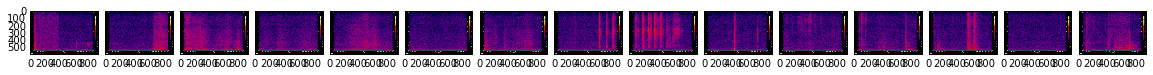

In [6]:
show_spectrograms('data', 'silent')

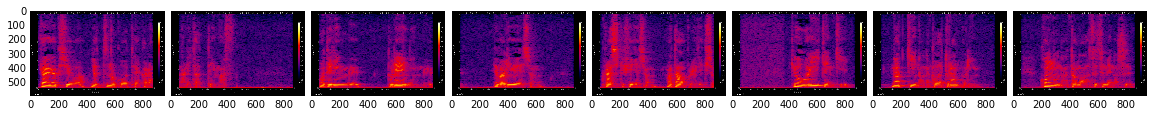

In [7]:
show_spectrograms('data', 'speech')

In [8]:
# =================================
# Main
# =================================

In [9]:
# Data Preparation
from sklearn.utils import resample
X, y = read_ceps(LABELS)
X, y = resample(X, y)


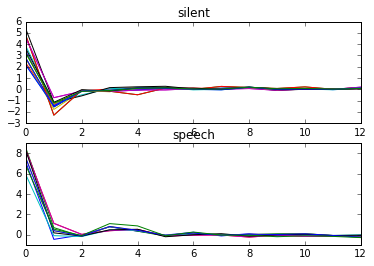

In [10]:
show_mfccs([211, 212], X, y, LABELS)

In [11]:
# Modeling
MODEL = lambda : MODEL_SVM(C=1)
classifier = MODEL()
classifier

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
# Training
classifier.fit(X, y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
# Evaluation(Test) and Visualization
# map(classifier.predict, [ x.reshape(1, -1) for x in X] )
result = cross_validate(X, y, N, MODEL)
result

[array(['silent'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['speech'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6'), array(['silent'], 
       dtype='|S6')]

[array([[5, 0],
       [0, 2]])]


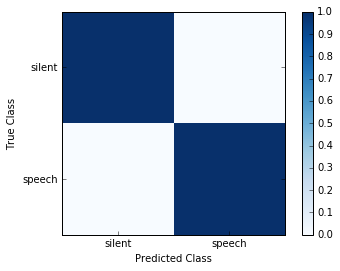

[array([[3, 0],
       [0, 3]])]


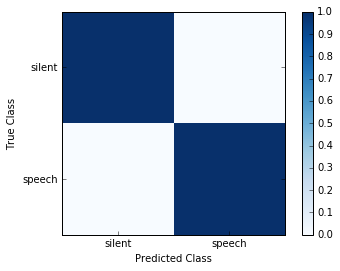

[array([[3, 0],
       [0, 3]])]


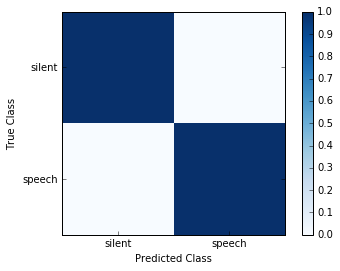

[array([[5, 0],
       [0, 1]])]


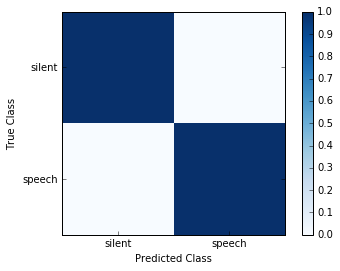

In [15]:
cms = [ cm for err, cm in result ]
for i in range(N):
    print[cms[i]]
    show_confusion_matrix(cms[i], LABELS)

In [29]:
# Classify or Prediction

def movefile(path, label):
    parent = os.path.dirname(path)
    base = os.path.basename(path)
    output_path = os.path.join(parent, label, base)
    os.rename(path, output_path)    
    
def assign(classifier, directory):
    for path in glob.glob(os.path.join(directory, "*_part_*.wav")):
        ceps = read_as_mfcc(path)
        feature = np.mean(trim_ceps(ceps), axis=0)
        label = classifier.predict(feature.reshape(1, -1))[0]
        print(label)
        movefile(path, label)

In [30]:
TARGET_DIR = './data/target'
divide_wav(os.path.join(TARGET_DIR, "target.wav"), sec=SEC)

In [31]:
assign(classifier, TARGET_DIR)

silent
speech
speech
speech
speech
silent
speech
